In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [117]:
from geoband.API import *

GetCompasData('PJT002_train.csv')
GetCompasData('PJT002_test.csv')
GetCompasData('PJT002_validation.csv')
GetCompasData('PJT002_submission.csv')

df_train = pd.read_csv('PJT002_train.csv')
df_val = pd.read_csv('PJT002_validation.csv')
df_test = pd.read_csv('PJT002_test.csv')
df_sub = pd.read_csv('PJT002_submission.csv')

In [118]:
df_train.head()

,dt_of_fr,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,...,no_tbc_zn_dstnc,bldng_cnt_in_50m,trgt_crtr,fr_fghtng_fclt_spcl_css_5_yn,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn
0,2017-10-20 05:54,Y,단독주택,블록구조,3,69.42,69.42,0.0,1977,1.0,...,88,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-09-30 08:26,N,NaN,NaN,3,46.29,46.29,0.0,NaN,1.0,...,7727,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-10-30 14:57,Y,공동주택,철근콘크리트구조,1,583.80,2516.76,1446.0,2.00011e+07,5.0,...,72,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-06-14 05:23,N,단독주택,일반목구조,2,48.92,48.92,0.0,1936,1.0,...,508,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-04-22 05:38,N,NaN,NaN,2,0.00,0.00,0.0,NaN,NaN,...,707,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
df_val.head()

,dt_of_fr,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,...,bldng_cnt_in_50m,trgt_crtr,fr_fghtng_fclt_spcl_css_5_yn,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn,fr_yn
0,2017-06-12 22:16,단독주택,블록구조,2,77.13,77.13,485.0,19861031.0,1.0,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2016-09-09 05:09,NaN,NaN,1,105.43,98.59,315.0,NaN,1.0,0.0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2017-01-31 21:30,단독주택,철근콘크리트구조,1,117.80,290.43,196.7,20060811.0,3.0,0.0,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,2016-01-14 16:08,공장,일반철골구조,1,336.00,336.00,1360.0,20000626.0,1.0,0.0,...,1,일반대상물,NaN,NaN,Y,N,N,N,N,Y
4,2018-10-22 22:00,단독주택,벽돌구조,3,251.02,250.45,840.0,19940124.0,1.0,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [120]:
df_test.head()

,dt_of_fr,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,...,bldng_cnt_in_50m,trgt_crtr,fr_fghtng_fclt_spcl_css_5_yn,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn,fr_yn
0,2016-02-03 15:28,NaN,NaN,3,0.00,0.00,0.0,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-03-17 18:25,공장,일반철골구조,2,915.75,903.75,2660.0,20011228.0,1.0,0.0,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-12-03 06:51,NaN,NaN,5,5523.87,9888.87,13607.0,NaN,9.0,0.0,...,1,NaN,N,N,N,N,N,N,N,NaN
3,2015-03-29 23:37,NaN,NaN,8,667.20,914.40,0.0,NaN,3.0,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-05-17 11:08,NaN,NaN,7,1050.06,1050.33,0.0,NaN,3.0,0.0,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
df_train.shape

(59199, 180)

In [122]:
list(df_train.columns.values) == list(df_val.columns.values)
#target값 위치가 다름

False

In [123]:
df_train.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59199 entries, 0 to 59198
Data columns (total 180 columns):
dt_of_fr                        object
fr_yn                           object
bldng_us                        object
bldng_archtctr                  object
bldng_cnt                       int64
bldng_ar                        float64
ttl_ar                          float64
lnd_ar                          float64
dt_of_athrztn                   object
ttl_grnd_flr                    float64
ttl_dwn_flr                     float64
bldng_us_clssfctn               object
tmprtr                          float64
prcpttn                         float64
wnd_spd                         float64
wnd_drctn                       float64
hmdt                            float64
gas_engry_us_201401             float64
ele_engry_us_201401             float64
gas_engry_us_201402             float64
ele_engry_us_201402             float64
gas_engry_us_201403             float64
ele_engry_us_20140

In [124]:
binary_y = {'N': 0, 'Y': 1}

df_train['fr_yn'] = df_train['fr_yn'].map(binary_y)
df_val['fr_yn'] = df_val['fr_yn'].map(binary_y)
df_test['fr_yn'] = df_test['fr_yn'].map(binary_y)
#화재 발생여부를 0과 1로 치환

In [125]:
for col in df_train.columns:
    msg = 'column: {:>10}\t\t Percent of NaN value : {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)
#Null값의 여부 확인

column:   dt_of_fr		 Percent of NaN value : 0.00%
column:      fr_yn		 Percent of NaN value : 0.00%
column:   bldng_us		 Percent of NaN value : 46.75%
column: bldng_archtctr		 Percent of NaN value : 46.73%
column:  bldng_cnt		 Percent of NaN value : 0.00%
column:   bldng_ar		 Percent of NaN value : 0.00%
column:     ttl_ar		 Percent of NaN value : 0.00%
column:     lnd_ar		 Percent of NaN value : 0.00%
column: dt_of_athrztn		 Percent of NaN value : 46.59%
column: ttl_grnd_flr		 Percent of NaN value : 17.25%
column: ttl_dwn_flr		 Percent of NaN value : 18.59%
column: bldng_us_clssfctn		 Percent of NaN value : 49.57%
column:     tmprtr		 Percent of NaN value : 0.02%
column:    prcpttn		 Percent of NaN value : 90.59%
column:    wnd_spd		 Percent of NaN value : 0.06%
column:  wnd_drctn		 Percent of NaN value : 0.37%
column:       hmdt		 Percent of NaN value : 0.04%
column: gas_engry_us_201401		 Percent of NaN value : 46.59%
column: ele_engry_us_201401		 Percent of NaN value : 46.59%
column

In [126]:
drop = ['prcpttn','lw_13101010','lw_13101110','lw_13101210','lw_13101211','lw_13101310','lw_13101410','lw_13111010',
'lw_13111110','lw_13121010','lw_13121011','lw_13131010','lw_13131110','lw_13141010',
'lw_13141011','trgt_crtr','fr_fghtng_fclt_spcl_css_5_yn','fr_fghtng_fclt_spcl_css_6_yn',
'us_yn','dngrs_thng_yn','slf_fr_brgd_yn','blk_dngrs_thng_mnfctr_yn','cltrl_hrtg_yn']
df_train.drop(drop,axis=1,inplace=True)
df_val.drop(drop,axis=1,inplace=True)
df_test.drop(drop,axis=1,inplace=True)
#널 값이 80% 이상인 컬럼 drop 

In [127]:
for col in df_train.columns:
    msg = 'column: {:>10}\t\t Percent of NaN value : {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column:   dt_of_fr		 Percent of NaN value : 0.00%
column:      fr_yn		 Percent of NaN value : 0.00%
column:   bldng_us		 Percent of NaN value : 46.75%
column: bldng_archtctr		 Percent of NaN value : 46.73%
column:  bldng_cnt		 Percent of NaN value : 0.00%
column:   bldng_ar		 Percent of NaN value : 0.00%
column:     ttl_ar		 Percent of NaN value : 0.00%
column:     lnd_ar		 Percent of NaN value : 0.00%
column: dt_of_athrztn		 Percent of NaN value : 46.59%
column: ttl_grnd_flr		 Percent of NaN value : 17.25%
column: ttl_dwn_flr		 Percent of NaN value : 18.59%
column: bldng_us_clssfctn		 Percent of NaN value : 49.57%
column:     tmprtr		 Percent of NaN value : 0.02%
column:    wnd_spd		 Percent of NaN value : 0.06%
column:  wnd_drctn		 Percent of NaN value : 0.37%
column:       hmdt		 Percent of NaN value : 0.04%
column: gas_engry_us_201401		 Percent of NaN value : 46.59%
column: ele_engry_us_201401		 Percent of NaN value : 46.59%
column: gas_engry_us_201402		 Percent of NaN value : 46.5

In [128]:
df_train.shape

(59199, 157)

In [129]:
mean_imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

In [130]:
gas = ['gas_engry_us_201401','gas_engry_us_201402','gas_engry_us_201403'
        ,'gas_engry_us_201404','gas_engry_us_201405','gas_engry_us_201406'
      ,'gas_engry_us_201407','gas_engry_us_201408','gas_engry_us_201409','gas_engry_us_201410',
       'gas_engry_us_201411','gas_engry_us_201412','gas_engry_us_201501','gas_engry_us_201502','gas_engry_us_201503'
        ,'gas_engry_us_201504','gas_engry_us_201505','gas_engry_us_201506'
      ,'gas_engry_us_201507','gas_engry_us_201508','gas_engry_us_201509','gas_engry_us_201510',
       'gas_engry_us_201511','gas_engry_us_201512','gas_engry_us_201601','gas_engry_us_201602','gas_engry_us_201603'
        ,'gas_engry_us_201604','gas_engry_us_201605','gas_engry_us_201606'
      ,'gas_engry_us_201607','gas_engry_us_201608','gas_engry_us_201609','gas_engry_us_201610',
       'gas_engry_us_201611','gas_engry_us_201612','gas_engry_us_201701','gas_engry_us_201702','gas_engry_us_201703'
        ,'gas_engry_us_201704','gas_engry_us_201705','gas_engry_us_201706'
      ,'gas_engry_us_201707','gas_engry_us_201708','gas_engry_us_201709','gas_engry_us_201710',
       'gas_engry_us_201711','gas_engry_us_201712','gas_engry_us_201801','gas_engry_us_201802','gas_engry_us_201803'
        ,'gas_engry_us_201804','gas_engry_us_201805','gas_engry_us_201806'
      ,'gas_engry_us_201807','gas_engry_us_201808','gas_engry_us_201809','gas_engry_us_201810',
       'gas_engry_us_201811','gas_engry_us_201812']
for gas_month in gas:
    df_train[gas_month] = mean_imp.fit_transform(df_train[[gas_month]]).ravel()
    df_val[gas_month] = mean_imp.fit_transform(df_val[[gas_month]]).ravel()
    df_test[gas_month] = mean_imp.fit_transform(df_test[[gas_month]]).ravel()
#평균으로 채워준다

In [131]:
df_train['gas_engry_us_201401']
#null값이 12667로 채워짐
#null값 채우는거 다시 고안해 볼 필요 있음.

0            0.000000
1        12667.549276
2            0.000000
3            0.000000
4        12667.549276
             ...     
59194        0.000000
59195    12667.549276
59196    12667.549276
59197        0.000000
59198        0.000000
Name: gas_engry_us_201401, Length: 59199, dtype: float64

In [132]:
df_train['gas'] = np.mean(df_train[gas],axis=1)
df_val['gas'] = np.mean(df_val[gas],axis=1)
df_test['gas'] = np.mean(df_test[gas],axis=1)
#gas와 ele의 열을 통합

In [133]:
df_train.drop(gas,axis=1,inplace=True)
df_val.drop(gas,axis=1,inplace=True)
df_test.drop(gas,axis=1,inplace=True)
#통합한 나머지 필요없는 컬럼 drop

In [134]:
ele = ['ele_engry_us_201401','ele_engry_us_201402','ele_engry_us_201403'
        ,'ele_engry_us_201404','ele_engry_us_201405','ele_engry_us_201406'
      ,'ele_engry_us_201407','ele_engry_us_201408','ele_engry_us_201409','ele_engry_us_201410',
       'ele_engry_us_201411','ele_engry_us_201412','ele_engry_us_201501','ele_engry_us_201502','ele_engry_us_201503'
        ,'ele_engry_us_201504','ele_engry_us_201505','ele_engry_us_201506'
      ,'ele_engry_us_201507','ele_engry_us_201508','ele_engry_us_201509','ele_engry_us_201510',
       'ele_engry_us_201511','ele_engry_us_201512','ele_engry_us_201601','ele_engry_us_201602','ele_engry_us_201603'
        ,'ele_engry_us_201604','ele_engry_us_201605','ele_engry_us_201606'
      ,'ele_engry_us_201607','ele_engry_us_201608','ele_engry_us_201609','ele_engry_us_201610',
       'ele_engry_us_201611','ele_engry_us_201612','ele_engry_us_201701','ele_engry_us_201702','ele_engry_us_201703'
        ,'ele_engry_us_201704','ele_engry_us_201705','ele_engry_us_201706'
      ,'ele_engry_us_201707','ele_engry_us_201708','ele_engry_us_201709','ele_engry_us_201710',
       'ele_engry_us_201711','ele_engry_us_201712','ele_engry_us_201801','ele_engry_us_201802','ele_engry_us_201803'
        ,'ele_engry_us_201804','ele_engry_us_201805','ele_engry_us_201806'
      ,'ele_engry_us_201807','ele_engry_us_201808','ele_engry_us_201809','ele_engry_us_201810',
       'ele_engry_us_201811','ele_engry_us_201812']
for ele_month in ele:
    df_train[ele_month] = mean_imp.fit_transform(df_train[[ele_month]]).ravel()
    df_val[ele_month] = mean_imp.fit_transform(df_val[[ele_month]]).ravel()
    df_test[ele_month] = mean_imp.fit_transform(df_test[[ele_month]]).ravel()
#평균으로 채워준다

In [135]:
df_train['ele_engry_us_201401']
#null값이 2302로 채워짐
#null값 채우는거 다시 고안해 볼 필요 있음.

0           0.00000
1        2302.02527
2           0.00000
3           0.00000
4        2302.02527
            ...    
59194       0.00000
59195    2302.02527
59196    2302.02527
59197       0.00000
59198       0.00000
Name: ele_engry_us_201401, Length: 59199, dtype: float64

In [136]:
df_train['ele'] = np.mean(df_train[ele],axis=1)
df_val['ele'] = np.mean(df_val[ele],axis=1)
df_test['ele'] = np.mean(df_test[ele],axis=1)
#gas와 ele의 열을 통합

In [137]:
df_train.drop(ele,axis=1,inplace=True)
df_val.drop(ele,axis=1,inplace=True)
df_test.drop(ele,axis=1,inplace=True)
#통합한 나머지 필요없는 컬럼 drop

In [138]:
df_train.head()

,dt_of_fr,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,...,cctv_dstnc,fr_wthr_fclt_in_100m,cctv_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,gas,ele
0,2017-10-20 05:54,1,단독주택,블록구조,3,69.42,69.42,0.0,1977,1.0,...,112,0,0,1891,29231,11322,88,0,0.000000,0.000000
1,2018-09-30 08:26,0,NaN,NaN,3,46.29,46.29,0.0,NaN,1.0,...,818,0,0,4533,20480,3369,7727,0,289599.080189,138227.168485
2,2016-10-30 14:57,1,공동주택,철근콘크리트구조,1,583.80,2516.76,1446.0,2.00011e+07,5.0,...,165,0,0,277,31197,12451,72,14,0.000000,0.000000
3,2016-06-14 05:23,0,단독주택,일반목구조,2,48.92,48.92,0.0,1936,1.0,...,131,0,0,438,4270,407,508,11,0.000000,0.000000
4,2018-04-22 05:38,0,NaN,NaN,2,0.00,0.00,0.0,NaN,NaN,...,686,0,0,1702,29778,12487,707,0,289599.080189,138227.168485


In [139]:
for col in df_train.columns:
    if 100*(df_train[col].isnull().sum()/df_train[col].shape[0] != 0):
        msg = 'column: {:>10}\t\t Percent of NaN value : {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
        print(msg)

column:   bldng_us		 Percent of NaN value : 46.75%
column: bldng_archtctr		 Percent of NaN value : 46.73%
column: dt_of_athrztn		 Percent of NaN value : 46.59%
column: ttl_grnd_flr		 Percent of NaN value : 17.25%
column: ttl_dwn_flr		 Percent of NaN value : 18.59%
column: bldng_us_clssfctn		 Percent of NaN value : 49.57%
column:     tmprtr		 Percent of NaN value : 0.02%
column:    wnd_spd		 Percent of NaN value : 0.06%
column:  wnd_drctn		 Percent of NaN value : 0.37%
column:       hmdt		 Percent of NaN value : 0.04%
column: rgnl_ar_nm		 Percent of NaN value : 2.52%
column: rgnl_ar_nm2		 Percent of NaN value : 2.52%
column: lnd_us_sttn_nm		 Percent of NaN value : 3.00%
column:   rd_sd_nm		 Percent of NaN value : 2.52%
column:     emd_nm		 Percent of NaN value : 0.01%
column:     hm_cnt		 Percent of NaN value : 1.18%
column: bldng_ar_prc		 Percent of NaN value : 36.99%
column:  fr_mn_cnt		 Percent of NaN value : 0.07%


In [140]:
df_train[['bldng_us', 'fr_yn']].groupby(['bldng_us'], as_index=True).mean()

,fr_yn
bldng_us,
공공용시설,0.000000
공동주택,0.619554
공장,0.553011
관광휴게시설,0.700000
교육연구및복지시설,0.333333
교육연구시설,0.508108
교정및군사시설,0.428571
근린생활시설,0.258065
노유자시설,0.248780


In [141]:
pd.crosstab(df_train['bldng_us'],df_train['fr_yn'],margins=True).style.background_gradient(cmap='summer_r')
#shape=(35,4)

fr_yn,0,1,All
bldng_us,,,
공공용시설,1,0,1
공동주택,358,583,941
공장,527,652,1179
관광휴게시설,9,21,30
교육연구및복지시설,12,6,18
교육연구시설,91,94,185
교정및군사시설,4,3,7
근린생활시설,23,8,31
노유자시설,154,51,205


In [142]:
#공동주택 / 공장 / 단독주택 / 시설
'''
df_train['building_1'] = df_train.bldng_us.str.extract('([단독]\w+)')
#단독주택
df_train['building_2'] = df_train.bldng_us.str.extract('([공][동]\w+)')
#공동주택
df_train['building_3'] = df_train.bldng_us.str.extract('(\w+[장])')
#공장, 시장 등
df_train['building_4'] = df_train.bldng_us.str.extract('(\w+[시설])')
'''

"\ndf_train['building_1'] = df_train.bldng_us.str.extract('([단독]\\w+)')\n#단독주택\ndf_train['building_2'] = df_train.bldng_us.str.extract('([공][동]\\w+)')\n#공동주택\ndf_train['building_3'] = df_train.bldng_us.str.extract('(\\w+[장])')\n#공장, 시장 등\ndf_train['building_4'] = df_train.bldng_us.str.extract('(\\w+[시설])')\n"

In [143]:
def category_age(x):
    if x <= 31:
        return '판매및영업시설'
    elif  31 < x <= 70:
        return '공공용시설'
    elif 70 < x <= 120:
        return '파출소'
    elif 120 < x <= 220:
        return '단독주택'
    elif 220 < x <= 330:
        return '교정및군사시설'
    elif 330 < x <= 475:
        return '위험물저장및처리시설'
    elif 475 < x <= 602:
        return '노유자시설'
    elif 602 < x <= 636:
        return '제1종근린생활시설'
    elif 636 < x <= 678:
        return '종교시설'
    elif 678 < x <= 686:
        return '위락시설'
    elif 686 < x <= 688:
        return '묘지관련시설'
    elif 688 < x <= 692:
        return '동.식물 관련시설'
    elif 692 < x <= 740:
        return '발전시설'
    elif 740 < x <= 810:
        return '제2종근로생활시설'
    elif 810 < x <= 1350:
        return '근린생활시설'
    elif 1350 < x <= 1850:
        return '숙박시설'
    elif 1850 < x <= 2200:
        return '운수시설'
    elif 2200 < x <= 2400:
        return '자동차관련시설'
    elif 2400 < x <= 2570:
        return '분뇨.쓰레기처리시설'
    elif 2570 < x <= 2620:
        return '관광휴게시설'
    elif 2620 < x <= 2850:
        return '문화및집회시설'
    elif 2850 < x <= 3170:
        return '수련시설'
    elif 3170 < x <= 3420:
        return '장례식장'
    elif 3420 < x <= 3800:
        return '방송통신시설'
    elif 3800 < x <= 4300:
        return '교육연구및복지시설'
    elif 4300 < x <= 4650:
        return '시장'
    elif 4650 < x <= 5000:
        return '업무시설'
    elif 5000 < x <= 5370:
        return '창고시설'
    elif 5370 < x <= 5700:
        return '운동시설'
    elif 5700 < x <= 7000:
        return '의료시설'
    elif 7000 < x <= 18000:
        return '공장'
    elif 18000 < x <= 45000:
        return '판매시설'
    elif 45000 < x <= 77000:
        return '교육연구시설'
    else :
        return '공동주택'

In [144]:
df_train['ttl_ar'] = df_train['ttl_ar'].apply(category_age)
df_val['ttl_ar'] = df_val['ttl_ar'].apply(category_age)
df_test['ttl_ar'] = df_test['ttl_ar'].apply(category_age)
#건물연면적에 따라 null값을 채운다, 통합

In [145]:
df_train.drop(['bldng_us'],axis=1,inplace=True)
df_val.drop(['bldng_us'],axis=1,inplace=True)
df_test.drop(['bldng_us'],axis=1,inplace=True)

In [146]:
pd.crosstab(df_train['bldng_archtctr'],df_train['ttl_ar'],margins=True).style.background_gradient(cmap='summer_r')

ttl_ar,공공용시설,공동주택,공장,관광휴게시설,교육연구및복지시설,교육연구시설,교정및군사시설,근린생활시설,노유자시설,단독주택,동.식물 관련시설,묘지관련시설,문화및집회시설,발전시설,방송통신시설,분뇨.쓰레기처리시설,수련시설,숙박시설,시장,업무시설,운동시설,운수시설,위락시설,위험물저장및처리시설,의료시설,자동차관련시설,장례식장,제1종근린생활시설,제2종근로생활시설,종교시설,창고시설,파출소,판매및영업시설,판매시설,All
bldng_archtctr,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
강파이프구조,22,0,0,0,2,0,57,32,29,86,1,0,3,6,1,4,0,13,0,0,0,4,0,61,0,2,1,5,8,9,1,47,1,0,395
경량철골구조,461,0,21,2,6,0,310,123,114,745,5,2,3,24,16,5,11,46,6,7,3,20,3,222,11,20,10,19,35,27,4,983,102,12,3378
기타강구조,7,0,1,0,0,0,3,2,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,1,0,0,11,1,0,36
기타구조,6,0,0,0,0,0,1,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,10,1,1,27
기타조적구조,44,0,7,0,2,0,21,2,1,37,0,0,1,1,1,0,1,1,0,0,0,1,0,6,0,0,0,0,2,0,0,41,7,0,176
기타콘크리트구조,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
목구조,10,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0,17
벽돌구조,651,2,14,0,3,0,690,26,54,2374,0,0,0,3,1,1,2,15,0,1,4,4,2,240,2,4,2,9,10,6,2,2979,272,4,7377
블록구조,1305,0,8,1,0,2,178,28,30,774,2,0,1,10,1,1,1,13,0,0,0,2,1,89,3,3,3,6,10,7,0,1364,241,3,4087


In [147]:
df_train['bldng_archtctr'].fillna(-1,inplace=True)
df_train.loc[(df_train['bldng_archtctr'] == -1) & (df_train['ttl_ar']) == '공공용시설', 'bldng_archtctr']='일반목구조'
df_train.loc[(df_train['bldng_archtctr'] == -1) & (df_train['ttl_ar']) == '단독주택', 'bldng_archtctr']='벽돌구조'
df_train.loc[(df_train['bldng_archtctr'] == -1) & (df_train['ttl_ar']) == '시장', 'bldng_archtctr']='일반철골구조'
df_train.loc[(df_train['bldng_archtctr'] == -1) & (df_train['ttl_ar']) == '파출소', 'bldng_archtctr']='벽돌구조'
df_train.loc[(df_train['bldng_archtctr'] == -1) & (df_train['ttl_ar']) == '판매및영업시설', 'bldng_archtctr']='일반목구조'
df_train.loc[(df_train['bldng_archtctr'] == -1),'bldng_archtctr']='철근콘크리트구조'

df_val['bldng_archtctr'].fillna(-1,inplace=True)
df_val.loc[(df_val['bldng_archtctr'] == -1) & (df_val['ttl_ar']) == '공공용시설', 'bldng_archtctr']='일반목구조'
df_val.loc[(df_val['bldng_archtctr'] == -1) & (df_val['ttl_ar']) == '단독주택', 'bldng_archtctr']='벽돌구조'
df_val.loc[(df_val['bldng_archtctr'] == -1) & (df_val['ttl_ar']) == '시장', 'bldng_archtctr']='일반철골구조'
df_val.loc[(df_val['bldng_archtctr'] == -1) & (df_val['ttl_ar']) == '파출소', 'bldng_archtctr']='벽돌구조'
df_val.loc[(df_val['bldng_archtctr'] == -1) & (df_val['ttl_ar']) == '판매및영업시설', 'bldng_archtctr']='일반목구조'
df_val.loc[(df_val['bldng_archtctr'] == -1),'bldng_archtctr']='철근콘크리트구조'

df_test['bldng_archtctr'].fillna(-1,inplace=True)
df_test.loc[(df_test['bldng_archtctr'] == -1) & (df_test['ttl_ar']) == '공공용시설', 'bldng_archtctr']='일반목구조'
df_test.loc[(df_test['bldng_archtctr'] == -1) & (df_test['ttl_ar']) == '단독주택', 'bldng_archtctr']='벽돌구조'
df_test.loc[(df_test['bldng_archtctr'] == -1) & (df_test['ttl_ar']) == '시장', 'bldng_archtctr']='일반철골구조'
df_test.loc[(df_test['bldng_archtctr'] == -1) & (df_test['ttl_ar']) == '파출소', 'bldng_archtctr']='벽돌구조'
df_test.loc[(df_test['bldng_archtctr'] == -1) & (df_test['ttl_ar']) == '판매및영업시설', 'bldng_archtctr']='일반목구조'
df_test.loc[(df_test['bldng_archtctr'] == -1),'bldng_archtctr']='철근콘크리트구조'
#시설과 구조를 엮어서 구조의 null값 채운다

In [148]:
df_train['bldng_archtctr'].isnull().sum()

0

In [149]:
df_train['dt_of_athrztn'].fillna(1,inplace=True)
df_val['dt_of_athrztn'].fillna(1,inplace=True)
df_test['dt_of_athrztn'].fillna(1,inplace=True)
df_train['dt_of_athrztn']
#null값을 1로 만들어 줌

0               1977
1                  1
2        2.00011e+07
3               1936
4                  1
            ...     
59194    1.99612e+07
59195              1
59196              1
59197    2.00512e+07
59198    2.00205e+07
Name: dt_of_athrztn, Length: 59199, dtype: object

In [150]:
df_train['dt_of_athrztn'] = df_train['dt_of_athrztn'].astype(str).str.replace('-','')
df_train['dt_of_athrztn'] = df_train['dt_of_athrztn'].astype(str).str.replace(':','')
df_train['dt_of_athrztn'] = df_train['dt_of_athrztn'].astype(str).str.replace(' ','')

df_val['dt_of_athrztn'] = df_val['dt_of_athrztn'].astype(str).str.replace('-','')
df_val['dt_of_athrztn'] = df_val['dt_of_athrztn'].astype(str).str.replace(':','')
df_val['dt_of_athrztn'] = df_val['dt_of_athrztn'].astype(str).str.replace(' ','')

df_test['dt_of_athrztn'] = df_test['dt_of_athrztn'].astype(str).str.replace('-','')
df_test['dt_of_athrztn'] = df_test['dt_of_athrztn'].astype(str).str.replace(':','')
df_test['dt_of_athrztn'] = df_test['dt_of_athrztn'].astype(str).str.replace(' ','')
#기호를 없애서 obj 데이터 타입을 연산 가능하게끔 변환

In [151]:
df_train['dt_of_athrztn'] = pd.to_numeric(df_train['dt_of_athrztn'])
df_val['dt_of_athrztn'] = pd.to_numeric(df_val['dt_of_athrztn'])
df_test['dt_of_athrztn'] = pd.to_numeric(df_test['dt_of_athrztn'])
#기호를 없애서 numeric으로 float화 시킴
df_train['dt_of_athrztn']

0            1977.0
1               1.0
2        20001104.0
3            1936.0
4               1.0
            ...    
59194    19961203.0
59195           1.0
59196           1.0
59197    20051229.0
59198    20020520.0
Name: dt_of_athrztn, Length: 59199, dtype: float64

In [152]:
df_train['dt_of_athrztn'].fillna(-1,inplace=True)
df_train.loc[(1600 <= df_train['dt_of_athrztn']) & (df_train['dt_of_athrztn']< 2000), 'dt_of_athrztn']=2
df_train.loc[(2000 <= df_train['dt_of_athrztn']) & (df_train['dt_of_athrztn']< 2020), 'dt_of_athrztn']=3
df_train.loc[(160000 <= df_train['dt_of_athrztn']) & (df_train['dt_of_athrztn']< 200000), 'dt_of_athrztn']=2
df_train.loc[(200000 <= df_train['dt_of_athrztn']) & (df_train['dt_of_athrztn']< 202000), 'dt_of_athrztn']=3
df_train.loc[(1600000 <= df_train['dt_of_athrztn']) & (df_train['dt_of_athrztn']< 2000000), 'dt_of_athrztn']=2
df_train.loc[(2000000 <= df_train['dt_of_athrztn']) & (df_train['dt_of_athrztn']< 2020000), 'dt_of_athrztn']=3
df_train.loc[(16000000 <= df_train['dt_of_athrztn']) & ( df_train['dt_of_athrztn'] < 20000000), 'dt_of_athrztn']=2
df_train.loc[(20000000 <= df_train['dt_of_athrztn']) & (df_train['dt_of_athrztn'] < 20200000), 'dt_of_athrztn']=3
df_train.loc[(df_train['dt_of_athrztn']!=1)&(df_train['dt_of_athrztn']!=2)&(df_train['dt_of_athrztn']!=3),'dt_of_athrztn']=1

df_val['dt_of_athrztn'].fillna(-1,inplace=True)
df_val.loc[(1600 <= df_val['dt_of_athrztn']) & (df_val['dt_of_athrztn']< 2000), 'dt_of_athrztn']=2
df_val.loc[(2000 <= df_val['dt_of_athrztn']) & (df_val['dt_of_athrztn']< 2020), 'dt_of_athrztn']=3
df_val.loc[(160000 <= df_val['dt_of_athrztn']) & (df_val['dt_of_athrztn']< 200000), 'dt_of_athrztn']=2
df_val.loc[(200000 <= df_val['dt_of_athrztn']) & (df_val['dt_of_athrztn']< 202000), 'dt_of_athrztn']=3
df_val.loc[(1600000 <= df_val['dt_of_athrztn']) & (df_val['dt_of_athrztn']< 2000000), 'dt_of_athrztn']=2
df_val.loc[(2000000 <= df_val['dt_of_athrztn']) & (df_val['dt_of_athrztn']< 2020000), 'dt_of_athrztn']=3
df_val.loc[(16000000 <= df_val['dt_of_athrztn']) & ( df_val['dt_of_athrztn'] < 20000000), 'dt_of_athrztn']=2
df_val.loc[(20000000 <= df_val['dt_of_athrztn']) & (df_val['dt_of_athrztn'] < 20200000), 'dt_of_athrztn']=3
df_val.loc[(df_val['dt_of_athrztn']!=1)&(df_val['dt_of_athrztn']!=2)&(df_val['dt_of_athrztn']!=3),'dt_of_athrztn']=1

df_test['dt_of_athrztn'].fillna(-1,inplace=True)
df_test.loc[(1600 <= df_test['dt_of_athrztn']) & (df_test['dt_of_athrztn']< 2000), 'dt_of_athrztn']=2
df_test.loc[(2000 <= df_test['dt_of_athrztn']) & (df_test['dt_of_athrztn']< 2020), 'dt_of_athrztn']=3
df_test.loc[(160000 <= df_test['dt_of_athrztn']) & (df_test['dt_of_athrztn']< 200000), 'dt_of_athrztn']=2
df_test.loc[(200000 <= df_test['dt_of_athrztn']) & (df_test['dt_of_athrztn']< 202000), 'dt_of_athrztn']=3
df_test.loc[(1600000 <= df_test['dt_of_athrztn']) & (df_test['dt_of_athrztn']< 2000000), 'dt_of_athrztn']=2
df_test.loc[(2000000 <= df_test['dt_of_athrztn']) & (df_test['dt_of_athrztn']< 2020000), 'dt_of_athrztn']=3
df_test.loc[(16000000 <= df_test['dt_of_athrztn']) & ( df_test['dt_of_athrztn'] < 20000000), 'dt_of_athrztn']=2
df_test.loc[(20000000 <= df_test['dt_of_athrztn']) & (df_test['dt_of_athrztn'] < 20200000), 'dt_of_athrztn']=3
df_test.loc[(df_test['dt_of_athrztn']!=1)&(df_test['dt_of_athrztn']!=2)&(df_test['dt_of_athrztn']!=3),'dt_of_athrztn']=1
df_train['dt_of_athrztn']
#1은 NaN 혹은 애매한 수  2는 2000년 이전 3은 2000년 이후

0        2.0
1        1.0
2        3.0
3        2.0
4        1.0
        ... 
59194    2.0
59195    1.0
59196    1.0
59197    3.0
59198    3.0
Name: dt_of_athrztn, Length: 59199, dtype: float64

In [153]:
pd.crosstab(df_train['dt_of_athrztn'],df_train['fr_yn'],margins=True).style.background_gradient(cmap='summer_r')

fr_yn,0,1,All
dt_of_athrztn,,,
1.0,27585,2,27587
2.0,16828,4586,21414
3.0,7129,3069,10198
All,51542,7657,59199


In [154]:
df_train[['dt_of_athrztn', 'fr_yn']].groupby(['dt_of_athrztn'], as_index=True).mean()

,fr_yn
dt_of_athrztn,
1.0,0.000072
2.0,0.214159
3.0,0.300941


In [155]:
pd.crosstab(df_train['dt_of_athrztn'],df_train['bldng_archtctr'],margins=True).style.background_gradient(cmap='summer_r')
#NaN은 대부분 철곤콘크리트 구조다(?)

bldng_archtctr,강파이프구조,경량철골구조,기타강구조,기타구조,기타조적구조,기타콘크리트구조,목구조,벽돌구조,블록구조,석구조,일반목구조,일반철골구조,조적구조,철골철근콘크리트구조,철골콘크리트구조,철근콘크리트구조,통나무구조,프리케스트콘크리트구조,All
dt_of_athrztn,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,0,0,0,0,3,2,0,0,0,0,0,0,27582,0,0,27587
2.0,243,1017,8,12,145,1,17,5966,3701,52,6254,426,384,4,20,3150,2,12,21414
3.0,152,2361,28,15,31,0,0,1408,384,3,598,1512,14,39,15,3627,9,2,10198
All,395,3378,36,27,176,1,17,7377,4087,55,6852,1938,398,43,35,34359,11,14,59199


In [156]:
pd.crosstab(df_train['bldng_archtctr'],df_train['fr_yn'],margins=True).style.background_gradient(cmap='summer_r')
#철콘콘크리트는 실제로 화재가 많이 안 일어났다 

fr_yn,0,1,All
bldng_archtctr,,,
강파이프구조,295,100,395
경량철골구조,2398,980,3378
기타강구조,25,11,36
기타구조,20,7,27
기타조적구조,130,46,176
기타콘크리트구조,1,0,1
목구조,15,2,17
벽돌구조,6270,1107,7377
블록구조,3335,752,4087


In [157]:
for col in df_train.columns:
    if 100*(df_train[col].isnull().sum()/df_train[col].shape[0] != 0):
        msg = 'column: {:>10}\t\t Percent of NaN value : {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
        print(msg)

column: ttl_grnd_flr		 Percent of NaN value : 17.25%
column: ttl_dwn_flr		 Percent of NaN value : 18.59%
column: bldng_us_clssfctn		 Percent of NaN value : 49.57%
column:     tmprtr		 Percent of NaN value : 0.02%
column:    wnd_spd		 Percent of NaN value : 0.06%
column:  wnd_drctn		 Percent of NaN value : 0.37%
column:       hmdt		 Percent of NaN value : 0.04%
column: rgnl_ar_nm		 Percent of NaN value : 2.52%
column: rgnl_ar_nm2		 Percent of NaN value : 2.52%
column: lnd_us_sttn_nm		 Percent of NaN value : 3.00%
column:   rd_sd_nm		 Percent of NaN value : 2.52%
column:     emd_nm		 Percent of NaN value : 0.01%
column:     hm_cnt		 Percent of NaN value : 1.18%
column: bldng_ar_prc		 Percent of NaN value : 36.99%
column:  fr_mn_cnt		 Percent of NaN value : 0.07%


In [158]:
print('건물들의 지상 층수의 평균 :',df_train['ttl_grnd_flr'].mean())
print('건물들의 지상 층수의 NaN 값 :',df_train['ttl_grnd_flr'].isnull().sum())
print('건물들의 지하 층수의 평균 :', df_train['ttl_dwn_flr'].mean())
print('건물들의 지하 층수의 NaN 값 :',df_train['ttl_dwn_flr'].isnull().sum())

건물들의 지상 층수의 평균 : 3.193145399987752
건물들의 지상 층수의 NaN 값 : 10210
건물들의 지하 층수의 평균 : 0.13246462215213511
건물들의 지하 층수의 NaN 값 : 11005


In [159]:
df_train.loc[df_train.ttl_grnd_flr.isnull(),'ttl_grnd_flr']=3
df_train.loc[df_train.ttl_dwn_flr.isnull(),'ttl_dwn_flr']=0

df_val.loc[df_val.ttl_grnd_flr.isnull(),'ttl_grnd_flr']=3
df_val.loc[df_val.ttl_dwn_flr.isnull(),'ttl_dwn_flr']=0

df_test.loc[df_test.ttl_grnd_flr.isnull(),'ttl_grnd_flr']=3
df_test.loc[df_test.ttl_dwn_flr.isnull(),'ttl_dwn_flr']=0
#지상 층수, 지하 층수의 NaN값을 평균으로 넣어줌

In [160]:
print('건물용도분류명 NaN 값 :',df_train['bldng_us_clssfctn'].isnull().sum())
df_train['bldng_us_clssfctn'].unique()

건물용도분류명 NaN 값 : 29343


array(['주거용', nan, '상업용', '문교사회용', '공업용', '농수산용', '기타', '공공용'],
      dtype=object)

In [161]:
pd.crosstab(df_train['ttl_ar'],df_train['bldng_us_clssfctn'],margins=True).style.background_gradient(cmap='summer_r')

bldng_us_clssfctn,공공용,공업용,기타,농수산용,문교사회용,상업용,주거용,All
ttl_ar,,,,,,,,
공공용시설,2,3,206,95,52,399,4933,5690
공동주택,0,12,6,0,6,6,175,205
공장,2,135,7,10,75,93,79,401
관광휴게시설,0,3,1,1,3,6,2,16
교육연구및복지시설,2,22,7,6,13,16,14,80
교육연구시설,0,17,0,0,3,9,85,114
교정및군사시설,2,39,228,161,35,662,1188,2315
근린생활시설,5,136,41,100,72,399,113,866
노유자시설,0,64,52,83,32,376,272,879


In [162]:
df_train['bldng_us_clssfctn'].fillna(-1,inplace=True)
df_train.loc[(df_train['bldng_us_clssfctn'] == -1) & (df_train['ttl_ar']) == '공장', 'bldng_us_clssfctn']='공업용'
df_train.loc[(df_train['bldng_us_clssfctn'] == -1) & (df_train['ttl_ar']) == '근린생활시설', 'bldng_us_clssfctn']='상업용'
df_train.loc[(df_train['bldng_us_clssfctn'] == -1) & (df_train['ttl_ar']) == '노유자시설', 'bldng_us_clssfctn']='상업용'
df_train.loc[(df_train['bldng_us_clssfctn'] == -1) & (df_train['ttl_ar']) == '문화및집회시설', 'bldng_us_clssfctn']='공업용'
df_train.loc[(df_train['bldng_us_clssfctn'] == -1) & (df_train['ttl_ar']) == '발전시설', 'bldng_us_clssfctn']='상업용'
df_train.loc[(df_train['bldng_us_clssfctn'] == -1) & (df_train['ttl_ar']) == '방송통신시설', 'bldng_us_clssfctn']='상업용'
df_train.loc[(df_train['bldng_us_clssfctn'] == -1) & (df_train['ttl_ar']) == '분뇨.쓰레기처리시설', 'bldng_us_clssfctn']='공업용'
df_train.loc[(df_train['bldng_us_clssfctn'] == -1) & (df_train['ttl_ar']) == '수련시설', 'bldng_us_clssfctn']='상업용'
df_train.loc[(df_train['bldng_us_clssfctn'] == -1) & (df_train['ttl_ar']) == '숙박시설', 'bldng_us_clssfctn']='상업용'
df_train.loc[(df_train['bldng_us_clssfctn'] == -1) & (df_train['ttl_ar']) == '시장', 'bldng_us_clssfctn']='공업용'
df_train.loc[(df_train['bldng_us_clssfctn'] == -1) & (df_train['ttl_ar']) == '운수시설', 'bldng_us_clssfctn']='상업용'
df_train.loc[(df_train['bldng_us_clssfctn'] == -1) & (df_train['ttl_ar']) == '위락시설', 'bldng_us_clssfctn']='상업용'
df_train.loc[(df_train['bldng_us_clssfctn'] == -1) & (df_train['ttl_ar']) == '제1종근린생활시설	', 'bldng_us_clssfctn']='상업용'
df_train.loc[(df_train['bldng_us_clssfctn'] == -1) & (df_train['ttl_ar']) == '제2종근린생활시설', 'bldng_us_clssfctn']='상업용'
df_train.loc[(df_train['bldng_us_clssfctn'] == -1) & (df_train['ttl_ar']) == '판매시설', 'bldng_us_clssfctn']='공업용'
df_train.loc[(df_train['bldng_us_clssfctn'] == -1), 'bldng_us_clssfctn']='주거용'
#mostfrequent로 넣어준다
#마지막에 -1일때 주거용으로 넣고 튀는 것만 선택해서 넣어주기

In [163]:
df_val['bldng_us_clssfctn'].fillna(-1,inplace=True)
df_val.loc[(df_val['bldng_us_clssfctn'] == -1) & (df_val['ttl_ar']) == '공장', 'bldng_us_clssfctn']='공업용'
df_val.loc[(df_val['bldng_us_clssfctn'] == -1) & (df_val['ttl_ar']) == '근린생활시설', 'bldng_us_clssfctn']='상업용'
df_val.loc[(df_val['bldng_us_clssfctn'] == -1) & (df_val['ttl_ar']) == '노유자시설', 'bldng_us_clssfctn']='상업용'
df_val.loc[(df_val['bldng_us_clssfctn'] == -1) & (df_val['ttl_ar']) == '문화및집회시설', 'bldng_us_clssfctn']='공업용'
df_val.loc[(df_val['bldng_us_clssfctn'] == -1) & (df_val['ttl_ar']) == '발전시설', 'bldng_us_clssfctn']='상업용'
df_val.loc[(df_val['bldng_us_clssfctn'] == -1) & (df_val['ttl_ar']) == '방송통신시설', 'bldng_us_clssfctn']='상업용'
df_val.loc[(df_val['bldng_us_clssfctn'] == -1) & (df_val['ttl_ar']) == '분뇨.쓰레기처리시설', 'bldng_us_clssfctn']='공업용'
df_val.loc[(df_val['bldng_us_clssfctn'] == -1) & (df_val['ttl_ar']) == '수련시설', 'bldng_us_clssfctn']='상업용'
df_val.loc[(df_val['bldng_us_clssfctn'] == -1) & (df_val['ttl_ar']) == '숙박시설', 'bldng_us_clssfctn']='상업용'
df_val.loc[(df_val['bldng_us_clssfctn'] == -1) & (df_val['ttl_ar']) == '시장', 'bldng_us_clssfctn']='공업용'
df_val.loc[(df_val['bldng_us_clssfctn'] == -1) & (df_val['ttl_ar']) == '운수시설', 'bldng_us_clssfctn']='상업용'
df_val.loc[(df_val['bldng_us_clssfctn'] == -1) & (df_val['ttl_ar']) == '위락시설', 'bldng_us_clssfctn']='상업용'
df_val.loc[(df_val['bldng_us_clssfctn'] == -1) & (df_val['ttl_ar']) == '제1종근린생활시설	', 'bldng_us_clssfctn']='상업용'
df_val.loc[(df_val['bldng_us_clssfctn'] == -1) & (df_val['ttl_ar']) == '제2종근린생활시설', 'bldng_us_clssfctn']='상업용'
df_val.loc[(df_val['bldng_us_clssfctn'] == -1) & (df_val['ttl_ar']) == '판매시설', 'bldng_us_clssfctn']='공업용'
df_val.loc[(df_val['bldng_us_clssfctn'] == -1), 'bldng_us_clssfctn']='주거용'

In [164]:
df_test['bldng_us_clssfctn'].fillna(-1,inplace=True)
df_test.loc[(df_test['bldng_us_clssfctn'] == -1) & (df_test['ttl_ar']) == '공장', 'bldng_us_clssfctn']='공업용'
df_test.loc[(df_test['bldng_us_clssfctn'] == -1) & (df_test['ttl_ar']) == '근린생활시설', 'bldng_us_clssfctn']='상업용'
df_test.loc[(df_test['bldng_us_clssfctn'] == -1) & (df_test['ttl_ar']) == '노유자시설', 'bldng_us_clssfctn']='상업용'
df_test.loc[(df_test['bldng_us_clssfctn'] == -1) & (df_test['ttl_ar']) == '문화및집회시설', 'bldng_us_clssfctn']='공업용'
df_test.loc[(df_test['bldng_us_clssfctn'] == -1) & (df_test['ttl_ar']) == '발전시설', 'bldng_us_clssfctn']='상업용'
df_test.loc[(df_test['bldng_us_clssfctn'] == -1) & (df_test['ttl_ar']) == '방송통신시설', 'bldng_us_clssfctn']='상업용'
df_test.loc[(df_test['bldng_us_clssfctn'] == -1) & (df_test['ttl_ar']) == '분뇨.쓰레기처리시설', 'bldng_us_clssfctn']='공업용'
df_test.loc[(df_test['bldng_us_clssfctn'] == -1) & (df_test['ttl_ar']) == '수련시설', 'bldng_us_clssfctn']='상업용'
df_test.loc[(df_test['bldng_us_clssfctn'] == -1) & (df_test['ttl_ar']) == '숙박시설', 'bldng_us_clssfctn']='상업용'
df_test.loc[(df_test['bldng_us_clssfctn'] == -1) & (df_test['ttl_ar']) == '시장', 'bldng_us_clssfctn']='공업용'
df_test.loc[(df_test['bldng_us_clssfctn'] == -1) & (df_test['ttl_ar']) == '운수시설', 'bldng_us_clssfctn']='상업용'
df_test.loc[(df_test['bldng_us_clssfctn'] == -1) & (df_test['ttl_ar']) == '위락시설', 'bldng_us_clssfctn']='상업용'
df_test.loc[(df_test['bldng_us_clssfctn'] == -1) & (df_test['ttl_ar']) == '제1종근린생활시설	', 'bldng_us_clssfctn']='상업용'
df_test.loc[(df_test['bldng_us_clssfctn'] == -1) & (df_test['ttl_ar']) == '제2종근린생활시설', 'bldng_us_clssfctn']='상업용'
df_test.loc[(df_test['bldng_us_clssfctn'] == -1) & (df_test['ttl_ar']) == '판매시설', 'bldng_us_clssfctn']='공업용'
df_test.loc[(df_test['bldng_us_clssfctn'] == -1), 'bldng_us_clssfctn']='주거용'

In [165]:
df_train['tmprtr'] = mean_imp.fit_transform(df_train[['tmprtr']]).ravel()
df_train['wnd_spd'] = mean_imp.fit_transform(df_train[['wnd_spd']]).ravel()
df_train['wnd_drctn'] = mean_imp.fit_transform(df_train[['wnd_drctn']]).ravel()
df_train['hmdt'] = mean_imp.fit_transform(df_train[['hmdt']]).ravel()

df_val['tmprtr'] = mean_imp.fit_transform(df_val[['tmprtr']]).ravel()
df_val['wnd_spd'] = mean_imp.fit_transform(df_val[['wnd_spd']]).ravel()
df_val['wnd_drctn'] = mean_imp.fit_transform(df_val[['wnd_drctn']]).ravel()
df_val['hmdt'] = mean_imp.fit_transform(df_val[['hmdt']]).ravel()

df_test['tmprtr'] = mean_imp.fit_transform(df_test[['tmprtr']]).ravel()
df_test['wnd_spd'] = mean_imp.fit_transform(df_test[['wnd_spd']]).ravel()
df_test['wnd_drctn'] = mean_imp.fit_transform(df_test[['wnd_drctn']]).ravel()
df_test['hmdt'] = mean_imp.fit_transform(df_test[['hmdt']]).ravel()

In [166]:
for col in df_train.columns:
    if 100*(df_train[col].isnull().sum()/df_train[col].shape[0] != 0):
        msg = 'column: {:>10}\t\t Percent of NaN value : {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
        print(msg)

column: rgnl_ar_nm		 Percent of NaN value : 2.52%
column: rgnl_ar_nm2		 Percent of NaN value : 2.52%
column: lnd_us_sttn_nm		 Percent of NaN value : 3.00%
column:   rd_sd_nm		 Percent of NaN value : 2.52%
column:     emd_nm		 Percent of NaN value : 0.01%
column:     hm_cnt		 Percent of NaN value : 1.18%
column: bldng_ar_prc		 Percent of NaN value : 36.99%
column:  fr_mn_cnt		 Percent of NaN value : 0.07%


In [167]:
df_train[['rgnl_ar_nm','fr_yn']].groupby(['rgnl_ar_nm'],as_index=False).count().sort_values(by='fr_yn',ascending=False)

,rgnl_ar_nm,fr_yn
1,계획관리지역,25552
17,제2종일반주거지역,9967
15,제1종일반주거지역,4438
13,자연녹지지역,3399
12,일반상업지역,3043
7,생산관리지역,2103
4,농림지역,2024
5,보전관리지역,1982
11,일반공업지역,902
19,제3종일반주거지역,827


In [168]:
df_train['rgnl_ar_nm'].fillna('계획관리지역',inplace=True)
df_val['rgnl_ar_nm'].fillna('계획관리지역',inplace=True)
df_test['rgnl_ar_nm'].fillna('계획관리지역',inplace=True)

df_train['rgnl_ar_nm'].isnull().sum()
#NaN value가 많지 않으므로 최빈값으로 넣어줌

0

In [169]:
df_train[['rgnl_ar_nm2','fr_yn']].groupby(['rgnl_ar_nm2'],as_index=False).count().sort_values(by='fr_yn',ascending=False)

,rgnl_ar_nm2,fr_yn
18,지정되지않음,56703
11,자연녹지지역,233
14,제2종일반주거지역,150
1,계획관리지역,95
5,보전관리지역,83
13,제1종일반주거지역,81
4,농림지역,80
10,일반상업지역,62
12,자연환경보전지역,39
6,보전녹지지역,37


In [170]:
df_train['rgnl_ar_nm2'].fillna('지정되지않음',inplace=True)
df_val['rgnl_ar_nm2'].fillna('지정되지않음',inplace=True)
df_test['rgnl_ar_nm2'].fillna('지정되지않음',inplace=True)
df_train['rgnl_ar_nm2'].isnull().sum()
#마찬가지로 최빈값

0

In [171]:
df_train[['lnd_us_sttn_nm','fr_yn']].groupby(['lnd_us_sttn_nm'],as_index=False).count().sort_values(by='fr_yn',ascending=False)

,lnd_us_sttn_nm,fr_yn
11,단독,34739
34,주거기타,3966
19,상업용,3191
38,주상용,2957
5,공업용,2000
31,전,1525
12,답,1291
35,주거나지,1159
13,답기타,1081
32,전기타,826


In [172]:
df_train['lnd_us_sttn_nm'].fillna('단독',inplace=True)
df_val['lnd_us_sttn_nm'].fillna('단독',inplace=True)
df_test['lnd_us_sttn_nm'].fillna('단독',inplace=True)
df_train['lnd_us_sttn_nm'].isnull().sum()
#마찬가지

0

In [173]:
df_train[['rd_sd_nm','fr_yn']].groupby(['rd_sd_nm'],as_index=False).count().sort_values(by='fr_yn',ascending=False)

,rd_sd_nm,fr_yn
6,세로한면(가),21117
7,세로한면(불),15667
9,소로한면,8920
3,맹지,2300
8,소로각지,2213
11,중로한면,2170
4,세로각지(가),2056
10,중로각지,1385
5,세로각지(불),699
0,광대로한면,642


In [174]:
df_train['rd_sd_nm'].fillna('세로한면(가)',inplace=True)
df_val['rd_sd_nm'].fillna('세로한면(가)',inplace=True)
df_test['rd_sd_nm'].fillna('세로한면(가)',inplace=True)
df_train['rd_sd_nm'].isnull().sum()
#마찬가지

0

In [175]:
df_train[['emd_nm','fr_yn']].groupby(['emd_nm'],as_index=False).count().sort_values(by='fr_yn',ascending=False)

,emd_nm,fr_yn
24,경상남도 거창군 거창읍,897
37,경상남도 고성군 고성읍,803
332,경상남도 함양군 함양읍,606
179,경상남도 창녕군 창녕읍,494
53,경상남도 남해군 남해읍,492
...,...,...
91,경상남도 사천시 실안동,1
202,경상남도 창원시 진해구 안골동,1
201,경상남도 창원시 진해구 명동,1
200,경상남도 창원시 진해구 남양동,1


In [176]:
df_train['emd_nm'].fillna('경상남도 거창군 거창읍',inplace=True)
df_val['emd_nm'].fillna('경상남도 거창군 거창읍',inplace=True)
df_test['emd_nm'].fillna('경상남도 거창군 거창읍',inplace=True)
df_train['emd_nm'].isnull().sum()
#0.01%라 많은걸로 넣어줌

0

In [177]:
df_train['hm_cnt'] = mean_imp.fit_transform(df_train[['hm_cnt']]).ravel()
df_train['fr_mn_cnt'] = mean_imp.fit_transform(df_train[['fr_mn_cnt']]).ravel()

df_val['hm_cnt'] = mean_imp.fit_transform(df_val[['hm_cnt']]).ravel()
df_val['fr_mn_cnt'] = mean_imp.fit_transform(df_val[['fr_mn_cnt']]).ravel()

df_test['hm_cnt'] = mean_imp.fit_transform(df_test[['hm_cnt']]).ravel()
df_test['fr_mn_cnt'] = mean_imp.fit_transform(df_test[['fr_mn_cnt']]).ravel()

In [178]:
pd.crosstab(df_train['bldng_ar_prc'],df_train['bldng_cnt'],margins=True)

bldng_cnt,1,2,3,4,5,6,7,8,9,10,...,64,68,69,79,94,99,114,117,139,All
bldng_ar_prc,,,,,,,,,,,,,,,,,,,,,
17537.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17775.0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17841.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
17966.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18830.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7059298.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7073955.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8117170.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [179]:
df_train['bldng_ar_prc'].fillna(-1,inplace=True)
df_train.loc[(10000 <= df_train['bldng_ar_prc']) & (df_train['bldng_ar_prc']< 200000), 'bldng_ar_prc']=1
df_train.loc[(200000 <= df_train['bldng_ar_prc']) & (df_train['bldng_ar_prc']< 500000), 'bldng_ar_prc']=2
df_train.loc[(500000 <= df_train['bldng_ar_prc']) & (df_train['bldng_ar_prc']< 1000000), 'bldng_ar_prc']=3
df_train.loc[(1000000 <= df_train['bldng_ar_prc']) & (df_train['bldng_ar_prc']< 2000000), 'bldng_ar_prc']=4
df_train.loc[(2000000 <= df_train['bldng_ar_prc']) & (df_train['bldng_ar_prc']< 16000000), 'bldng_ar_prc']=5

df_val['bldng_ar_prc'].fillna(-1,inplace=True)
df_val.loc[(10000 <= df_val['bldng_ar_prc']) & (df_val['bldng_ar_prc']< 200000), 'bldng_ar_prc']=1
df_val.loc[(200000 <= df_val['bldng_ar_prc']) & (df_val['bldng_ar_prc']< 500000), 'bldng_ar_prc']=2
df_val.loc[(500000 <= df_val['bldng_ar_prc']) & (df_val['bldng_ar_prc']< 1000000), 'bldng_ar_prc']=3
df_val.loc[(1000000 <= df_val['bldng_ar_prc']) & (df_val['bldng_ar_prc']< 2000000), 'bldng_ar_prc']=4
df_val.loc[(2000000 <= df_val['bldng_ar_prc']) & (df_val['bldng_ar_prc']< 16000000), 'bldng_ar_prc']=5

df_test['bldng_ar_prc'].fillna(-1,inplace=True)
df_test.loc[(10000 <= df_test['bldng_ar_prc']) & (df_test['bldng_ar_prc']< 200000), 'bldng_ar_prc']=1
df_test.loc[(200000 <= df_test['bldng_ar_prc']) & (df_test['bldng_ar_prc']< 500000), 'bldng_ar_prc']=2
df_test.loc[(500000 <= df_test['bldng_ar_prc']) & (df_test['bldng_ar_prc']< 1000000), 'bldng_ar_prc']=3
df_test.loc[(1000000 <= df_test['bldng_ar_prc']) & (df_test['bldng_ar_prc']< 2000000), 'bldng_ar_prc']=4
df_test.loc[(2000000 <= df_test['bldng_ar_prc']) & (df_test['bldng_ar_prc']< 16000000), 'bldng_ar_prc']=5
#가격별로 나누어 인코딩

In [180]:
pd.crosstab(df_train['bldng_ar_prc'],df_train['fr_yn'],margins=True)

fr_yn,0,1,All
bldng_ar_prc,,,
-1.0,18722,3173,21895
1.0,5511,539,6050
2.0,9804,1198,11002
3.0,11886,1879,13765
4.0,5069,793,5862
5.0,550,75,625
All,51542,7657,59199


In [181]:
df_train[['bldng_ar_prc','fr_yn']].groupby('bldng_ar_prc').mean()

,fr_yn
bldng_ar_prc,
-1.0,0.144919
1.0,0.089091
2.0,0.108889
3.0,0.136506
4.0,0.135278
5.0,0.120000


In [182]:
pd.crosstab(df_train['bldng_ar_prc'],df_train['ttl_ar'],margins=True).style.background_gradient(cmap='summer_r')
#bldng_ar_prc의 null을 채우기 위해 상관관계를 본다

ttl_ar,공공용시설,공동주택,공장,관광휴게시설,교육연구및복지시설,교육연구시설,교정및군사시설,근린생활시설,노유자시설,단독주택,동.식물 관련시설,묘지관련시설,문화및집회시설,발전시설,방송통신시설,분뇨.쓰레기처리시설,수련시설,숙박시설,시장,업무시설,운동시설,운수시설,위락시설,위험물저장및처리시설,의료시설,자동차관련시설,장례식장,제1종근린생활시설,제2종근로생활시설,종교시설,창고시설,파출소,판매및영업시설,판매시설,All
bldng_ar_prc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1.0,2367,55,499,22,131,52,1277,1034,701,2518,22,10,108,173,106,98,130,519,71,64,55,264,24,1201,130,131,84,121,238,222,72,2258,6929,209,21895
1.0,2146,0,2,1,0,0,201,20,23,949,0,0,0,8,0,2,0,14,0,0,0,1,0,82,0,0,1,3,4,3,0,1837,753,0,6050
2.0,2819,0,4,2,1,0,546,68,105,2294,1,0,4,17,1,0,4,24,1,0,0,11,0,249,2,9,4,7,17,11,0,3695,1106,0,11002
3.0,2058,49,73,3,12,29,1158,233,423,3110,7,1,11,25,13,13,16,93,9,7,10,39,13,1013,21,22,10,68,47,139,8,4011,974,47,13765
4.0,1057,137,74,0,5,78,583,54,84,1236,2,0,4,18,3,6,1,24,0,4,2,36,4,273,13,7,9,19,18,20,4,1582,430,75,5862
5.0,205,20,0,0,0,6,16,1,5,66,0,0,0,0,0,0,1,0,0,0,0,0,0,9,1,0,0,1,0,0,0,198,90,6,625
All,10652,261,652,28,149,165,3781,1410,1341,10173,32,11,127,241,123,119,152,674,81,75,67,351,41,2827,167,169,108,219,324,395,84,13581,10282,337,59199


In [183]:
pd.crosstab(df_train['bldng_ar_prc'],df_train['emd_nm'],margins=True).style.background_gradient(cmap='summer_r')
#bldng_ar_prc의 null을 채우기 위해 상관관계를 본다

In [184]:
pd.crosstab(df_train['bldng_ar_prc'],df_train['bldng_us_clssfctn'],margins=True).style.background_gradient(cmap='summer_r')
#bldng_ar_prc의 null을 채우기 위해 상관관계를 본다

bldng_us_clssfctn,공공용,공업용,기타,농수산용,문교사회용,상업용,주거용,All
bldng_ar_prc,,,,,,,,
-1.0,33,1015,1226,1001,635,3475,14510,21895
1.0,0,4,118,99,4,67,5758,6050
2.0,1,15,311,81,5,358,10231,11002
3.0,0,7,203,34,23,1072,12426,13765
4.0,0,2,36,9,9,390,5416,5862
5.0,0,0,5,1,1,27,591,625
All,34,1043,1899,1225,677,5389,48932,59199


In [185]:
df_train.head()

,dt_of_fr,fr_yn,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,...,cctv_dstnc,fr_wthr_fclt_in_100m,cctv_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,gas,ele
0,2017-10-20 05:54,1,블록구조,3,69.42,공공용시설,0.0,2.0,1.0,0.0,...,112,0,0,1891,29231,11322,88,0,0.000000,0.000000
1,2018-09-30 08:26,0,철근콘크리트구조,3,46.29,공공용시설,0.0,1.0,1.0,0.0,...,818,0,0,4533,20480,3369,7727,0,289599.080189,138227.168485
2,2016-10-30 14:57,1,철근콘크리트구조,1,583.80,분뇨.쓰레기처리시설,1446.0,3.0,5.0,0.0,...,165,0,0,277,31197,12451,72,14,0.000000,0.000000
3,2016-06-14 05:23,0,일반목구조,2,48.92,공공용시설,0.0,2.0,1.0,0.0,...,131,0,0,438,4270,407,508,11,0.000000,0.000000
4,2018-04-22 05:38,0,철근콘크리트구조,2,0.00,판매및영업시설,0.0,1.0,3.0,0.0,...,686,0,0,1702,29778,12487,707,0,289599.080189,138227.168485


In [186]:
pd.crosstab(df_train['bldng_ar_prc'],df_train['ttl_grnd_flr'],margins=True).style.background_gradient(cmap='summer_r')
#bldng_ar_prc의 null을 채우기 위해 상관관계를 본다
#3층이 엄청 많다

ttl_grnd_flr,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,54.0,55.0,57.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,68.0,69.0,70.0,71.0,72.0,73.0,75.0,76.0,77.0,78.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,99.0,100.0,102.0,103.0,105.0,106.0,109.0,112.0,118.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0,131.0,132.0,133.0,138.0,139.0,141.0,142.0,143.0,144.0,148.0,149.0,151.0,152.0,156.0,158.0,159.0,160.0,163.0,164.0,165.0,167.0,171.0,172.0,175.0,176.0,177.0,178.0,180.0,181.0,182.0,183.0,184.0,186.0,189.0,191.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0,200.0,201.0,208.0,209.0,210.0,213.0,216.0,218.0,221.0,223.0,224.0,229.0,233.0,237.0,241.0,242.0,244.0,245.0,253.0,256.0,270.0,274.0,281.0,285.0,288.0,293.0,301.0,303.0,306.0,311.0,312.0,328.0,331.0,333.0,337.0,343.0,351.0,369.0


In [187]:
pd.crosstab(df_train['bldng_ar_prc'],df_train['ttl_dwn_flr'],margins=True).style.background_gradient(cmap='summer_r')
#bldng_ar_prc의 null을 채우기 위해 상관관계를 본다
#지하 없는 곳이 가장 많다

ttl_dwn_flr,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,21.0,23.0,30.0,31.0,33.0,36.0,42.0,46.0,48.0,60.0,All
bldng_ar_prc,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-1.0,20533,1098,168,40,22,6,5,1,3,5,0,3,0,0,2,0,1,0,1,0,0,0,1,0,6,0,0,0,0,21895
1.0,6040,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6050
2.0,10759,237,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11002
3.0,12459,1205,44,12,11,13,14,1,0,2,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,13765
4.0,5203,459,42,34,14,15,5,11,11,12,4,1,5,4,14,6,5,7,8,1,0,0,0,1,0,0,0,0,0,5862
5.0,590,11,1,0,0,2,0,0,3,1,2,0,2,3,0,0,0,1,0,0,5,0,0,0,0,1,1,1,1,625
All,55584,3019,261,86,48,36,24,13,17,20,6,7,7,7,16,6,6,8,9,1,5,1,1,1,6,1,1,1,1,59199


In [188]:
pd.crosstab(df_train['bldng_ar_prc'],df_train['ttl_grnd_flr'],margins=True).style.background_gradient(cmap='summer_r')
#비율대로 뿌려주는 방법이 있을까? -> 일단 null값 그대로 의미가 있다 생각하고 넘어가자

ttl_grnd_flr,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,54.0,55.0,57.0,59.0,60.0,61.0,62.0,63.0,64.0,65.0,66.0,68.0,69.0,70.0,71.0,72.0,73.0,75.0,76.0,77.0,78.0,80.0,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,99.0,100.0,102.0,103.0,105.0,106.0,109.0,112.0,118.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0,131.0,132.0,133.0,138.0,139.0,141.0,142.0,143.0,144.0,148.0,149.0,151.0,152.0,156.0,158.0,159.0,160.0,163.0,164.0,165.0,167.0,171.0,172.0,175.0,176.0,177.0,178.0,180.0,181.0,182.0,183.0,184.0,186.0,189.0,191.0,193.0,194.0,195.0,196.0,197.0,198.0,199.0,200.0,201.0,208.0,209.0,210.0,213.0,216.0,218.0,221.0,223.0,224.0,229.0,233.0,237.0,241.0,242.0,244.0,245.0,253.0,256.0,270.0,274.0,281.0,285.0,288.0,293.0,301.0,303.0,306.0,311.0,312.0,328.0,331.0,333.0,337.0,343.0,351.0,369.0


In [189]:
df_train['dt_of_fr'] = df_train['dt_of_fr'].astype(str).str.replace('-','')
df_train['dt_of_fr'] = df_train['dt_of_fr'].astype(str).str.replace(':','')
df_train['dt_of_fr'] = df_train['dt_of_fr'].astype(str).str.replace(' ','')
#발생 날짜를 정수형으로 바꿔주기 위해 특수 문자를 제거
print("화재 발생 가장 최근 {}, 가장 오래된 {} ".format(df_train['dt_of_fr'].max(),df_train['dt_of_fr'].min()))
df_train['dt_of_fr'] = pd.to_numeric(df_train['dt_of_fr'])
#pd.numeric으로 정수형으로 치환
df_train.loc[(201400000000 <= df_train['dt_of_fr']) & (df_train['dt_of_fr'] < 201500000000), 'dt_of_fr'] = 1 
df_train.loc[(201500000000 <= df_train['dt_of_fr']) & (df_train['dt_of_fr'] < 201600000000), 'dt_of_fr'] = 2 
df_train.loc[(201600000000 <= df_train['dt_of_fr']) & (df_train['dt_of_fr'] < 201700000000), 'dt_of_fr'] = 3 
df_train.loc[(201700000000 <= df_train['dt_of_fr']) & (df_train['dt_of_fr'] < 201800000000), 'dt_of_fr'] = 4 
df_train.loc[(201800000000 <= df_train['dt_of_fr']) & (df_train['dt_of_fr'] < 201900000000), 'dt_of_fr'] = 5 
df_train['dt_of_fr'].unique()

화재 발생 가장 최근 201812312120, 가장 오래된 201401010043 


array([4, 5, 3, 2, 1])

In [190]:
df_val['dt_of_fr'] = df_val['dt_of_fr'].astype(str).str.replace('-','')
df_val['dt_of_fr'] = df_val['dt_of_fr'].astype(str).str.replace(':','')
df_val['dt_of_fr'] = df_val['dt_of_fr'].astype(str).str.replace(' ','')
#발생 날짜를 정수형으로 바꿔주기 위해 특수 문자를 제거
print("화재 발생 가장 최근 {}, 가장 오래된 {} ".format(df_val['dt_of_fr'].max(),df_val['dt_of_fr'].min()))
df_val['dt_of_fr'] = pd.to_numeric(df_val['dt_of_fr'])
#pd.numeric으로 정수형으로 치환
df_val.loc[(201400000000 <= df_val['dt_of_fr']) & (df_val['dt_of_fr'] < 201500000000), 'dt_of_fr'] = 1 
df_val.loc[(201500000000 <= df_val['dt_of_fr']) & (df_val['dt_of_fr'] < 201600000000), 'dt_of_fr'] = 2 
df_val.loc[(201600000000 <= df_val['dt_of_fr']) & (df_val['dt_of_fr'] < 201700000000), 'dt_of_fr'] = 3 
df_val.loc[(201700000000 <= df_val['dt_of_fr']) & (df_val['dt_of_fr'] < 201800000000), 'dt_of_fr'] = 4 
df_val.loc[(201800000000 <= df_val['dt_of_fr']) & (df_val['dt_of_fr'] < 201900000000), 'dt_of_fr'] = 5 
df_val['dt_of_fr'].unique()

화재 발생 가장 최근 201812311307, 가장 오래된 201401011009 


array([4, 3, 5, 2, 1])

In [191]:
df_test['dt_of_fr'] = df_test['dt_of_fr'].astype(str).str.replace('-','')
df_test['dt_of_fr'] = df_test['dt_of_fr'].astype(str).str.replace(':','')
df_test['dt_of_fr'] = df_test['dt_of_fr'].astype(str).str.replace(' ','')
#발생 날짜를 정수형으로 바꿔주기 위해 특수 문자를 제거
print("화재 발생 가장 최근 {}, 가장 오래된 {} ".format(df_test['dt_of_fr'].max(),df_test['dt_of_fr'].min()))
df_test['dt_of_fr'] = pd.to_numeric(df_test['dt_of_fr'])
#pd.numeric으로 정수형으로 치환
df_test.loc[(201400000000 <= df_test['dt_of_fr']) & (df_test['dt_of_fr'] < 201500000000), 'dt_of_fr'] = 1 
df_test.loc[(201500000000 <= df_test['dt_of_fr']) & (df_test['dt_of_fr'] < 201600000000), 'dt_of_fr'] = 2 
df_test.loc[(201600000000 <= df_test['dt_of_fr']) & (df_test['dt_of_fr'] < 201700000000), 'dt_of_fr'] = 3 
df_test.loc[(201700000000 <= df_test['dt_of_fr']) & (df_test['dt_of_fr'] < 201800000000), 'dt_of_fr'] = 4 
df_test.loc[(201800000000 <= df_test['dt_of_fr']) & (df_test['dt_of_fr'] < 201900000000), 'dt_of_fr'] = 5 
df_test['dt_of_fr'].unique()

화재 발생 가장 최근 201812310837, 가장 오래된 201401012206 


array([3, 5, 2, 1, 4])

In [192]:
df_train.head()

,dt_of_fr,fr_yn,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,...,cctv_dstnc,fr_wthr_fclt_in_100m,cctv_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,gas,ele
0,4,1,블록구조,3,69.42,공공용시설,0.0,2.0,1.0,0.0,...,112,0,0,1891,29231,11322,88,0,0.000000,0.000000
1,5,0,철근콘크리트구조,3,46.29,공공용시설,0.0,1.0,1.0,0.0,...,818,0,0,4533,20480,3369,7727,0,289599.080189,138227.168485
2,3,1,철근콘크리트구조,1,583.80,분뇨.쓰레기처리시설,1446.0,3.0,5.0,0.0,...,165,0,0,277,31197,12451,72,14,0.000000,0.000000
3,3,0,일반목구조,2,48.92,공공용시설,0.0,2.0,1.0,0.0,...,131,0,0,438,4270,407,508,11,0.000000,0.000000
4,5,0,철근콘크리트구조,2,0.00,판매및영업시설,0.0,1.0,3.0,0.0,...,686,0,0,1702,29778,12487,707,0,289599.080189,138227.168485


In [193]:
df_train.info()
#카테고리칼 해줘야함
#df_of_fr도 날짜처럼 숫자화해서 카테고리칼 하는게 좋을듯

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59199 entries, 0 to 59198
Data columns (total 38 columns):
dt_of_fr                59199 non-null int64
fr_yn                   59199 non-null int64
bldng_archtctr          59199 non-null object
bldng_cnt               59199 non-null int64
bldng_ar                59199 non-null float64
ttl_ar                  59199 non-null object
lnd_ar                  59199 non-null float64
dt_of_athrztn           59199 non-null float64
ttl_grnd_flr            59199 non-null float64
ttl_dwn_flr             59199 non-null float64
bldng_us_clssfctn       59199 non-null object
tmprtr                  59199 non-null float64
wnd_spd                 59199 non-null float64
wnd_drctn               59199 non-null float64
hmdt                    59199 non-null float64
jmk                     59199 non-null object
id                      59199 non-null int64
rgnl_ar_nm              59199 non-null object
rgnl_ar_nm2             59199 non-null object
lnd_us_sttn_

In [194]:
df_train.columns

Index(['dt_of_fr', 'fr_yn', 'bldng_archtctr', 'bldng_cnt', 'bldng_ar',
       'ttl_ar', 'lnd_ar', 'dt_of_athrztn', 'ttl_grnd_flr', 'ttl_dwn_flr',
       'bldng_us_clssfctn', 'tmprtr', 'wnd_spd', 'wnd_drctn', 'hmdt', 'jmk',
       'id', 'rgnl_ar_nm', 'rgnl_ar_nm2', 'lnd_us_sttn_nm', 'rd_sd_nm',
       'emd_nm', 'hm_cnt', 'fr_sttn_dstnc', 'bldng_ar_prc',
       'fr_wthr_fclt_dstnc', 'fr_mn_cnt', 'mlt_us_yn', 'cctv_dstnc',
       'fr_wthr_fclt_in_100m', 'cctv_in_100m', 'tbc_rtl_str_dstnc',
       'sft_emrgnc_bll_dstnc', 'ahsm_dstnc', 'no_tbc_zn_dstnc',
       'bldng_cnt_in_50m', 'gas', 'ele'],
      dtype='object')

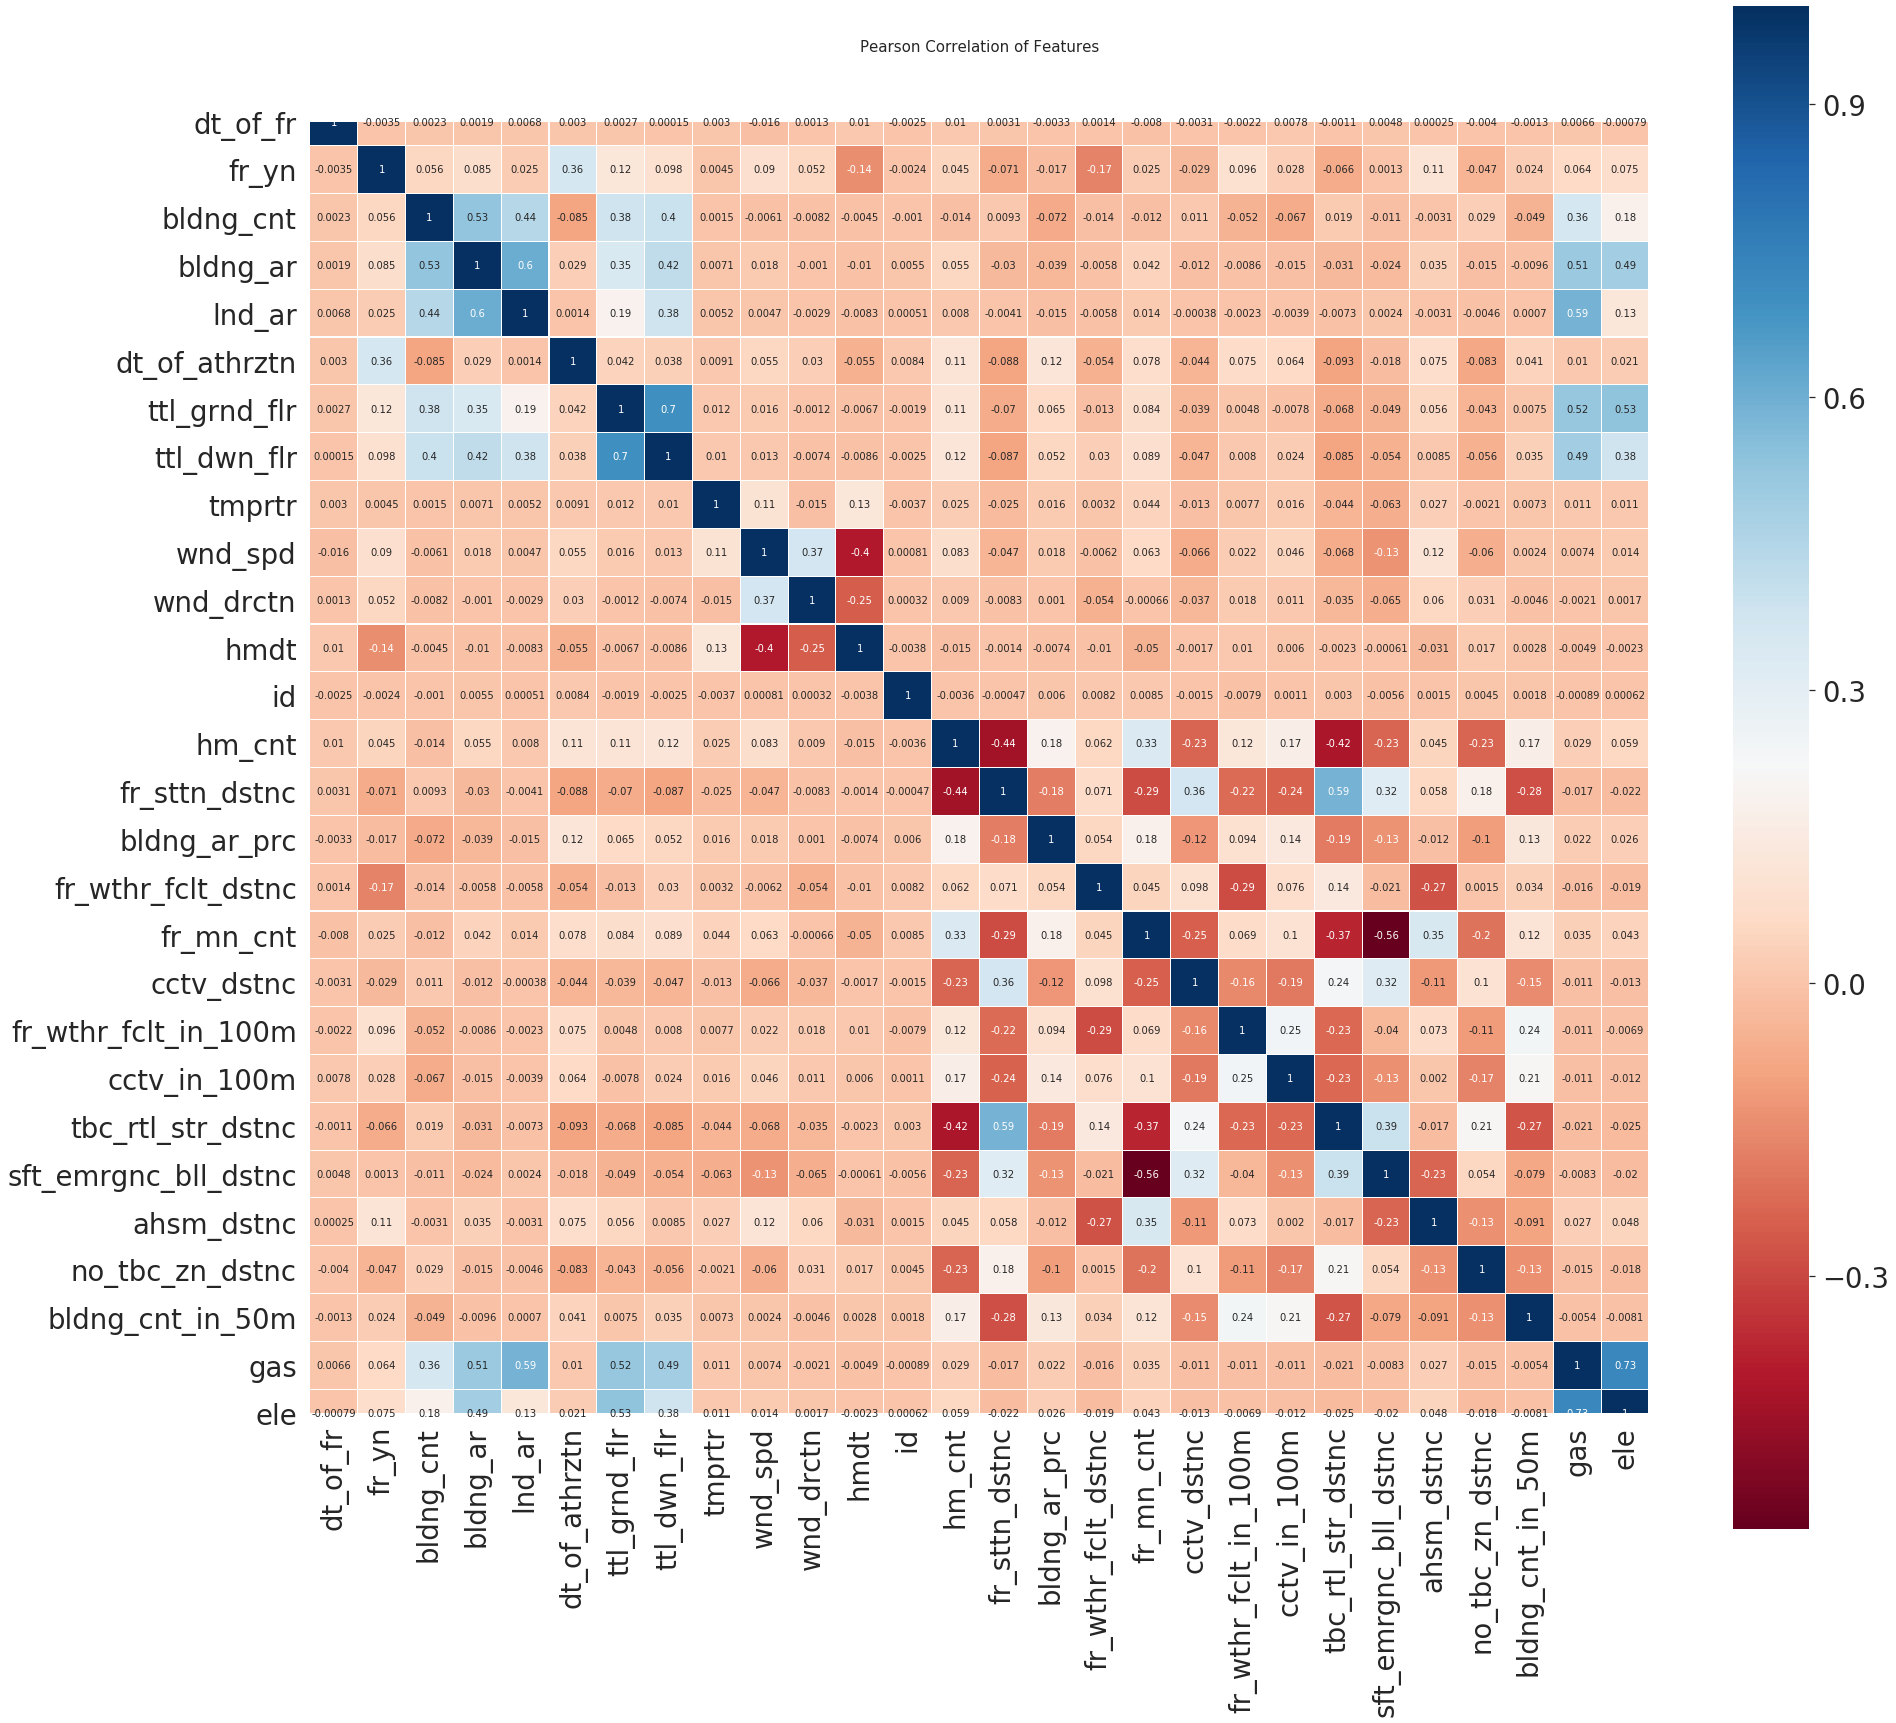

In [195]:
#히트맵

heatmap_data = df_train[['dt_of_fr', 'fr_yn', 'bldng_archtctr', 'bldng_cnt', 'bldng_ar',
       'ttl_ar', 'lnd_ar', 'dt_of_athrztn', 'ttl_grnd_flr', 'ttl_dwn_flr',
       'bldng_us_clssfctn', 'tmprtr', 'wnd_spd', 'wnd_drctn', 'hmdt', 'jmk',
       'id', 'rgnl_ar_nm', 'rgnl_ar_nm2', 'lnd_us_sttn_nm', 'rd_sd_nm',
       'emd_nm', 'hm_cnt', 'fr_sttn_dstnc', 'bldng_ar_prc',
       'fr_wthr_fclt_dstnc', 'fr_mn_cnt', 'mlt_us_yn', 'cctv_dstnc',
       'fr_wthr_fclt_in_100m', 'cctv_in_100m', 'tbc_rtl_str_dstnc',
       'sft_emrgnc_bll_dstnc', 'ahsm_dstnc', 'no_tbc_zn_dstnc',
       'bldng_cnt_in_50m', 'gas', 'ele']]
colormap = plt.cm.RdBu

plt.figure(figsize=(30,28))
plt.title('Pearson Correlation of Features', y=1.05,size=15)
sns.heatmap(heatmap_data.corr(),
           linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True,annot_kws={'size':10})
del heatmap_data


In [196]:
df_train.head()

,dt_of_fr,fr_yn,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,...,cctv_dstnc,fr_wthr_fclt_in_100m,cctv_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,gas,ele
0,4,1,블록구조,3,69.42,공공용시설,0.0,2.0,1.0,0.0,...,112,0,0,1891,29231,11322,88,0,0.000000,0.000000
1,5,0,철근콘크리트구조,3,46.29,공공용시설,0.0,1.0,1.0,0.0,...,818,0,0,4533,20480,3369,7727,0,289599.080189,138227.168485
2,3,1,철근콘크리트구조,1,583.80,분뇨.쓰레기처리시설,1446.0,3.0,5.0,0.0,...,165,0,0,277,31197,12451,72,14,0.000000,0.000000
3,3,0,일반목구조,2,48.92,공공용시설,0.0,2.0,1.0,0.0,...,131,0,0,438,4270,407,508,11,0.000000,0.000000
4,5,0,철근콘크리트구조,2,0.00,판매및영업시설,0.0,1.0,3.0,0.0,...,686,0,0,1702,29778,12487,707,0,289599.080189,138227.168485


In [197]:
df_val.head()

,dt_of_fr,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn,...,fr_wthr_fclt_in_100m,cctv_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fr_yn,gas,ele
0,4,블록구조,2,77.13,파출소,485.0,2.0,1.0,0.0,주거용,...,0,0,1314,6516,10650,754,0,0,0.000000e+00,0.000000e+00
1,3,철근콘크리트구조,1,105.43,파출소,315.0,1.0,1.0,0.0,주거용,...,0,0,2197,3510,8179,804,1,0,2.310888e+06,1.137587e+06
2,4,철근콘크리트구조,1,117.80,교정및군사시설,196.7,3.0,3.0,0.0,주거용,...,0,0,158,208,17229,179,5,0,0.000000e+00,0.000000e+00
3,3,일반철골구조,1,336.00,위험물저장및처리시설,1360.0,3.0,1.0,0.0,공업용,...,2,0,186,4167,7589,3279,1,1,0.000000e+00,2.558000e+03
4,5,벽돌구조,3,251.02,교정및군사시설,840.0,2.0,1.0,0.0,주거용,...,0,0,411,3307,13651,423,0,0,0.000000e+00,0.000000e+00


In [198]:
df_test.head()

,dt_of_fr,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn,...,fr_wthr_fclt_in_100m,cctv_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fr_yn,gas,ele
0,3,철근콘크리트구조,3,0.00,판매및영업시설,0.0,1.0,3.0,0.0,주거용,...,0,0,1352,10775,32295,1203,0,NaN,1.513965e+06,813822.846643
1,3,일반철골구조,2,915.75,근린생활시설,2660.0,3.0,1.0,0.0,공업용,...,0,0,1292,3225,18413,3572,8,NaN,0.000000e+00,0.000000
2,5,철근콘크리트구조,5,5523.87,공장,13607.0,1.0,9.0,0.0,주거용,...,1,0,924,1261,4903,561,1,NaN,1.513965e+06,813822.846643
3,2,철근콘크리트구조,8,667.20,근린생활시설,0.0,1.0,3.0,0.0,주거용,...,0,0,195,3111,5729,1829,0,NaN,1.513965e+06,813822.846643
4,3,철근콘크리트구조,7,1050.06,근린생활시설,0.0,1.0,3.0,0.0,주거용,...,0,0,3557,6103,8205,1833,4,NaN,1.513965e+06,813822.846643


In [199]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59199 entries, 0 to 59198
Data columns (total 38 columns):
dt_of_fr                59199 non-null int64
fr_yn                   59199 non-null int64
bldng_archtctr          59199 non-null object
bldng_cnt               59199 non-null int64
bldng_ar                59199 non-null float64
ttl_ar                  59199 non-null object
lnd_ar                  59199 non-null float64
dt_of_athrztn           59199 non-null float64
ttl_grnd_flr            59199 non-null float64
ttl_dwn_flr             59199 non-null float64
bldng_us_clssfctn       59199 non-null object
tmprtr                  59199 non-null float64
wnd_spd                 59199 non-null float64
wnd_drctn               59199 non-null float64
hmdt                    59199 non-null float64
jmk                     59199 non-null object
id                      59199 non-null int64
rgnl_ar_nm              59199 non-null object
rgnl_ar_nm2             59199 non-null object
lnd_us_sttn_

In [200]:
le = LabelEncoder()
le.fit(df_train['ttl_ar'])
df_train['ttl_ar'] = le.transform(df_train['ttl_ar'])

for label in np.unique(df_val['ttl_ar']):
    if label not in le.classes_:
        le.classes_ = np.append(le.classes_, label)

df_val['ttl_ar'] = le.transform(df_val['ttl_ar'])
df_test['ttl_ar'] = le.transform(df_test['ttl_ar'])

In [201]:
le = LabelEncoder()
le.fit(df_train['bldng_us_clssfctn'])
df_train['bldng_us_clssfctn'] = le.transform(df_train['bldng_us_clssfctn'])

for label in np.unique(df_val['bldng_us_clssfctn']):
    if label not in le.classes_:
        le.classes_ = np.append(le.classes_, label)

df_val['bldng_us_clssfctn'] = le.transform(df_val['bldng_us_clssfctn'])
df_test['bldng_us_clssfctn'] = le.transform(df_test['bldng_us_clssfctn'])

In [202]:
le = LabelEncoder()
le.fit(df_train['jmk'])
df_train['jmk'] = le.transform(df_train['jmk'])

for label in np.unique(df_val['jmk']):
    if label not in le.classes_:
        le.classes_ = np.append(le.classes_, label)

df_val['jmk'] = le.transform(df_val['jmk'])
df_test['jmk'] = le.transform(df_test['jmk'])

In [203]:
le = LabelEncoder()
le.fit(df_train['rgnl_ar_nm'])
df_train['rgnl_ar_nm'] = le.transform(df_train['rgnl_ar_nm'])

for label in np.unique(df_val['rgnl_ar_nm']):
    if label not in le.classes_:
        le.classes_ = np.append(le.classes_, label)

df_val['rgnl_ar_nm'] = le.transform(df_val['rgnl_ar_nm'])
df_test['rgnl_ar_nm'] = le.transform(df_test['rgnl_ar_nm'])

In [204]:
le = LabelEncoder()
le.fit(df_train['rgnl_ar_nm2'])
df_train['rgnl_ar_nm2'] = le.transform(df_train['rgnl_ar_nm2'])

for label in np.unique(df_val['rgnl_ar_nm2']):
    if label not in le.classes_:
        le.classes_ = np.append(le.classes_, label)

df_val['rgnl_ar_nm2'] = le.transform(df_val['rgnl_ar_nm2'])
df_test['rgnl_ar_nm2'] = le.transform(df_test['rgnl_ar_nm2'])

In [205]:
le = LabelEncoder()
le.fit(df_train['lnd_us_sttn_nm'])
df_train['lnd_us_sttn_nm'] = le.transform(df_train['lnd_us_sttn_nm'])

for label in np.unique(df_val['lnd_us_sttn_nm']):
    if label not in le.classes_:
        le.classes_ = np.append(le.classes_, label)

df_val['lnd_us_sttn_nm'] = le.transform(df_val['lnd_us_sttn_nm'])
df_test['lnd_us_sttn_nm'] = le.transform(df_test['lnd_us_sttn_nm'])

In [206]:
le = LabelEncoder()
le.fit(df_train['rd_sd_nm'])
df_train['rd_sd_nm'] = le.transform(df_train['rd_sd_nm'])

for label in np.unique(df_val['rd_sd_nm']):
    if label not in le.classes_:
        le.classes_ = np.append(le.classes_, label)

df_val['rd_sd_nm'] = le.transform(df_val['rd_sd_nm'])
df_test['rd_sd_nm'] = le.transform(df_test['rd_sd_nm'])

In [207]:
le = LabelEncoder()
le.fit(df_train['emd_nm'])
df_train['emd_nm'] = le.transform(df_train['emd_nm'])

for label in np.unique(df_val['emd_nm']):
    if label not in le.classes_:
        le.classes_ = np.append(le.classes_, label)

df_val['emd_nm'] = le.transform(df_val['emd_nm'])
df_test['emd_nm'] = le.transform(df_test['emd_nm'])

In [208]:
le = LabelEncoder()
le.fit(df_train['mlt_us_yn'])
df_train['mlt_us_yn'] = le.transform(df_train['mlt_us_yn'])

for label in np.unique(df_val['mlt_us_yn']):
    if label not in le.classes_:
        le.classes_ = np.append(le.classes_, label)

df_val['mlt_us_yn'] = le.transform(df_val['mlt_us_yn'])
df_test['mlt_us_yn'] = le.transform(df_test['mlt_us_yn'])

In [209]:
#분산 낮은 걸 제거해주는 VarianceThreshold 방법도 있음 참고 일단 안하고 넘어감

In [210]:
x_train = df_train.drop(['id','fr_yn'],axis=1)
y_train = df_train['fr_yn']

x_val = df_val.drop(['id','fr_yn'],axis=1)
y_val = df_val['fr_yn']

In [211]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

rf.fit(x_train,y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

ValueError: could not convert string to float: '블록구조'

In [ ]:
feat_labels = x_train.columns

for f in range(x_train.shape[1]):
    if f < 50:
        print("%2d) %-*s %f" %(f+1,30,feat_labels[indices[f]],importances[indices[f]]))

In [ ]:
#getdummies를 하면 컬럼 수가 많지 않아 훈련을 할 수 없다
#보완 할 수 있는 방법이 있는지 생각 해봐야 할 듯

In [ ]:
prediction = rf.predict(x_val)
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(len(y_val),100*metrics.accuracy_score(prediction,y_val)))

In [ ]:
df_sub.head()

In [ ]:
df_test.drop(['fr_yn','id'],axis=1,inplace=True)

In [ ]:
df_test.shape

In [ ]:
prediction = rf.predict(df_test)

In [214]:
df_sub['fr_yn'] = prediction

In [215]:
df_sub.to_csv('./my_submission_1.csv',index=False)